In [3]:
import collections
import pickle
import numpy as np
import pandas as pd
from functools import partial
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def report_to_df(clfreport):
    lines = clfreport.split('\n')
    lines = filter(lambda l: not len(l.strip()) == 0, lines)

    header = lines[0]
    cls_lines = lines[1:-1]
    avg_line = lines[-1]

    assert header.split() == ['precision', 'recall', 'f1-score', 'support']
    assert avg_line.split()[0] == 'avg'
    cls_field_width = len(header) - len(header.lstrip())
    
    def parse_line(l):
        """Parse a line of classification_report"""
        cls_name = l[:cls_field_width].strip()
        precision, recall, fscore, support = l[cls_field_width:].split()
        precision = float(precision)
        recall = float(recall)
        fscore = float(fscore)
        support = int(support)
        return [cls_name, precision, recall, fscore, support]

    data = collections.OrderedDict()
    for l in cls_lines:
        ret = parse_line(l)
        data[ret[0]] = ret[1:]
    data['Total/avg'] = parse_line(avg_line)[1:]
    df = pd.DataFrame.from_dict(data, orient = 'index')
    df.columns = ['precision', 'recall', 'f1-score', 'support']
    return df

In [5]:
# load SGD model classification report
with open('models/sgd_20_report.pickle', 'rb') as handle:
    sgd_report = pickle.load(handle)

In [36]:
# load forest model classification report
with open('models/rfor_model.pickle', 'rb') as handle:
    forest_report = pickle.load(handle)

In [37]:
print 'SGD model performance: '
sgd_report_df = report_to_df(sgd_report)
sgd_report_df

SGD model performance: 


,precision,recall,f1-score,support
Action,0.574,0.493,0.530,882
Adventure,0.376,0.325,0.349,471
Animation,0.926,0.575,0.709,501
Comedy,0.703,0.387,0.499,1905
Crime,0.466,0.395,0.428,602
Documentary,0.625,0.939,0.750,913
Drama,0.683,0.749,0.715,3068
Family,0.481,0.431,0.455,473
Fantasy,0.310,0.296,0.303,307
Foreign,0.246,0.340,0.286,297


In [45]:
forest_model = forest_report['class']

In [46]:
print forest_model

             precision  recall  f1-score  support
Action           0.500   0.005     0.010      200
Adventure        0.000   0.000     0.000      159
Animation        0.885   0.158     0.267      146
Comedy           0.849   0.086     0.156      525
Crime            0.600   0.050     0.092      181
Documentary      0.909   0.264     0.410      227
Drama            0.610   0.269     0.373      837
Family           0.864   0.128     0.222      149
Fantasy          0.000   0.000     0.000      105
Horror           0.000   0.000     0.000      178
Mystery          0.000   0.000     0.000       93
Romance          0.625   0.034     0.064      295
Sci-Fi           0.000   0.000     0.000       94
Short            0.750   0.150     0.250      200
Thriller         0.000   0.000     0.000      264
Total/avg        0.537   0.116     0.177     3653


In [47]:
# load inseption V3 based model classification report
with open('models/cnn_v3_20_report.pickle', 'rb') as handle:
    v3_report = pickle.load(handle)

In [48]:
print 'Inception V3 based CNN model performance: '
v3_report_df = report_to_df(v3_report)
v3_report_df

Inception V3 based CNN model performance: 


,precision,recall,f1-score,support
Action,0.597,0.536,0.565,640
Adventure,0.685,0.533,0.599,323
Animation,0.727,0.745,0.736,400
Comedy,0.571,0.552,0.561,1470
Crime,0.568,0.533,0.550,368
Documentary,0.582,0.618,0.599,829
Drama,0.613,0.602,0.607,2182
Family,0.688,0.619,0.652,349
Fantasy,0.756,0.544,0.633,217
Foreign,0.721,0.488,0.582,207


In [49]:
# load custom CNN model classification report
with open('models/multi_cnn_report.pickle', 'rb') as handle:
    cnn_report = pickle.load(handle)

In [50]:
print 'Custom CNN model performance: '
cnn_report_df = report_to_df(cnn_report)
cnn_report_df

Custom CNN model performance: 


,precision,recall,f1-score,support
Action,0.788,0.356,0.490,646
Adventure,0.942,0.485,0.640,332
Animation,0.880,0.579,0.698,392
Comedy,0.654,0.415,0.508,1513
Crime,0.884,0.437,0.585,403
Documentary,0.620,0.553,0.584,876
Drama,0.629,0.432,0.513,2100
Family,0.906,0.546,0.681,370
Fantasy,0.991,0.553,0.710,208
Foreign,0.970,0.497,0.658,195


In [51]:
# combine performance data into a single dataframe
sgd_report_df['model'] = 'svm'
v3_report_df['model'] = 'v3'
cnn_report_df['model'] = 'cnn'
forest_model['model'] = 'forest'

combined_performance_df = result = pd.concat([sgd_report_df, v3_report_df, cnn_report_df, forest_model])
combined_performance_df.set_index('model', append=True, inplace=True)

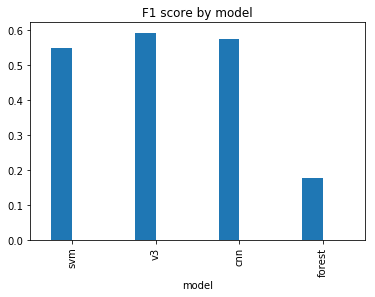

In [52]:
combined_performance_df.loc['Total/avg', ['f1-score', 'model']].plot(kind="bar", title = 'F1 score by model')
plt.legend().set_visible(False)

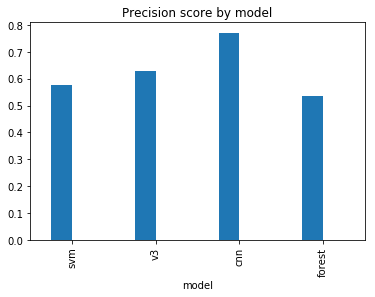

In [53]:
combined_performance_df.loc['Total/avg', ['precision', 'model']].plot(kind="bar", title = 'Precision score by model')
plt.legend().set_visible(False)

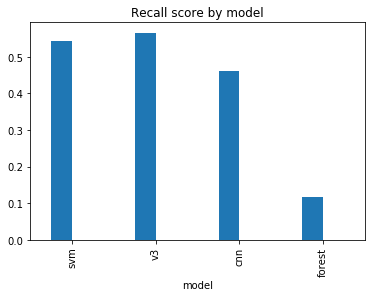

In [54]:
combined_performance_df.loc['Total/avg', ['recall', 'model']].plot(kind="bar", title = 'Recall score by model')
plt.legend().set_visible(False)

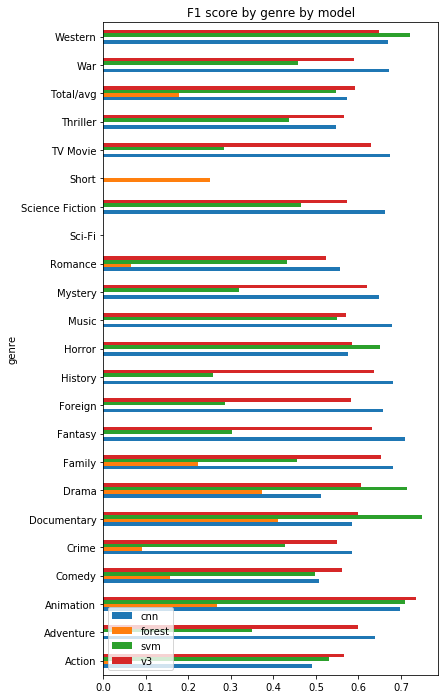

In [55]:
combined_performance_df['genre'] = combined_performance_df.index.get_level_values(0)
combined_performance_df['model'] = combined_performance_df.index.get_level_values(1)
by_genre_df = combined_performance_df.pivot(index='genre', columns='model', values='f1-score')
by_genre_df.reset_index()
by_genre_df.plot.barh(figsize = (6, 12), title = 'F1 score by genre by model')
plt.legend(loc=3)